In [1]:
import numpy
import os
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [2]:
cvae_fn = '/mmfs1/data/aglinska/tf_outputs/CVAE/Feb23_1551_D16B1G100_DTrue'
#vae_fn = '/mmfs1/data/aglinska/tf_outputs/VAE/APR_4th_D32DTrue_G100'
vae_fn = '/mmfs1/data/aglinska/tf_outputs/VAE/20210920-2122'

In [3]:
cvae_loss = pickle.load(open(cvae_fn+'_loss.pickle','rb'))
vae_loss = pickle.load(open(vae_fn+'_loss.pickle','rb'))

In [4]:
#vae_loss = vae_loss[0:1971]
print(len(cvae_loss))
print(len(vae_loss))

1971
74800


In [5]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [6]:
len(cvae_loss)

1971

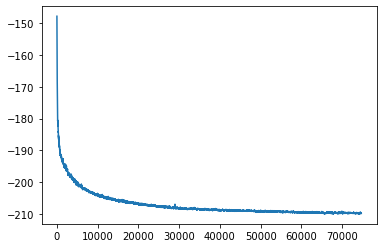

In [7]:
plt.plot(moving_average(vae_loss[10::],100))

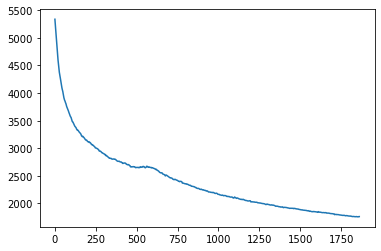

In [8]:
plt.plot(moving_average(cvae_loss[10::],100))

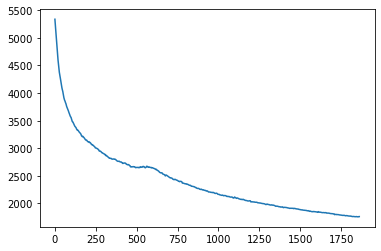

In [9]:
plt.plot(moving_average(cvae_loss[10::],100))

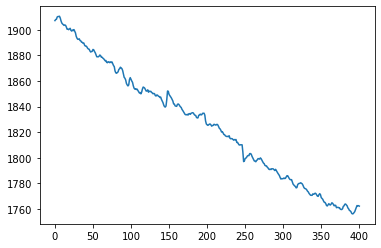

In [10]:
plt.plot(moving_average(cvae_loss[-500::],100))

In [11]:
len(cvae_loss[2::])

1969

In [12]:
len(cvae_loss)

1971

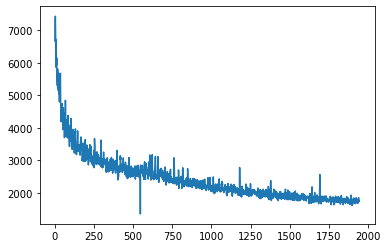

In [13]:
plt.plot(cvae_loss[25::])

0.39053466796875


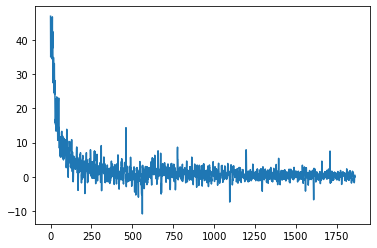

In [14]:
vec=moving_average(np.array(cvae_loss)[0:-1]-np.array(cvae_loss)[1::],100)
plt.plot(vec[10::])
print(vec[-1])

0.010790557861328124


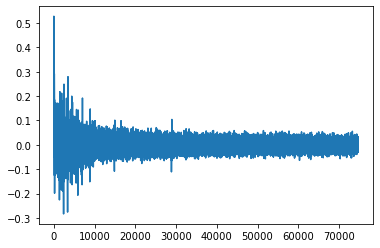

In [15]:
vec=moving_average(np.array(vae_loss)[0:-1]-np.array(vae_loss)[1::],100)
plt.plot(vec[10::])
print(vec[-1])

In [16]:
# vec1=moving_average(cvae_loss,50)[1::]
# vec2=moving_average(cvae_loss,50)[0:-1]
# plt.plot((vec2-vec1)[25::])

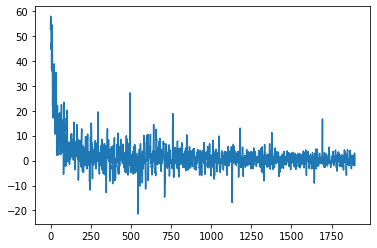

In [17]:
vec1=moving_average(cvae_loss,50)[1::]
vec2=moving_average(cvae_loss,50)[0:-1]
plot_vec = (vec2-vec1)[25::]
#plot_vec = (vec2-vec1)[-100::]
plt.plot(plot_vec)

array([0.63762624, 1.        , 0.73218909, ..., 0.47773786, 0.48034093,
       0.44865881])

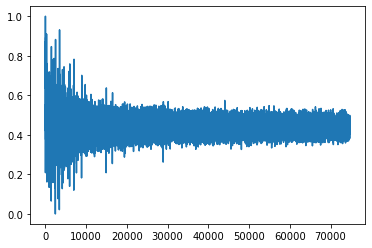

In [38]:
vec1=moving_average(vae_loss,50)[1::]
vec2=moving_average(vae_loss,50)[0:-1]
plot_vec= (vec2-vec1)[25::]
#plot_vec= (vec2-vec1)[-100::]
plot_vec = (plot_vec-plot_vec.min())/(plot_vec.max()-plot_vec.min())
plt.plot(plot_vec)

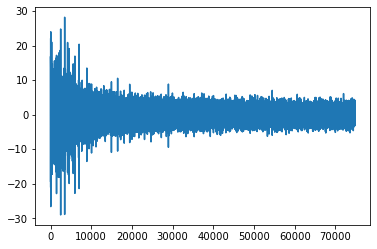

In [47]:
vec1=vae_loss[1::]
vec2=vae_loss[0:-1]
plot_vec= (vec2-vec1)[25::]
#plot_vec= (vec2-vec1)[-100::]
#plot_vec = (plot_vec-plot_vec.min())/(plot_vec.max()-plot_vec.min())
plt.plot(plot_vec)

In [49]:
#vae_loss = np.array(vae_loss)

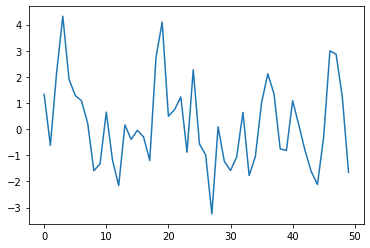

In [19]:
vec1=moving_average(cvae_loss,50)[1::]
vec2=moving_average(cvae_loss,50)[0:-1]
plot_vec = (vec2-vec1)[-50::]
plt.plot(plot_vec)

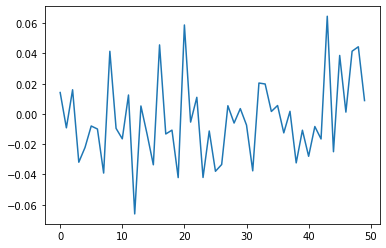

In [20]:
vec1=moving_average(vae_loss,50)[1::]
vec2=moving_average(vae_loss,50)[0:-1]
plot_vec= (vec2-vec1)[-50::]
plt.plot(plot_vec)

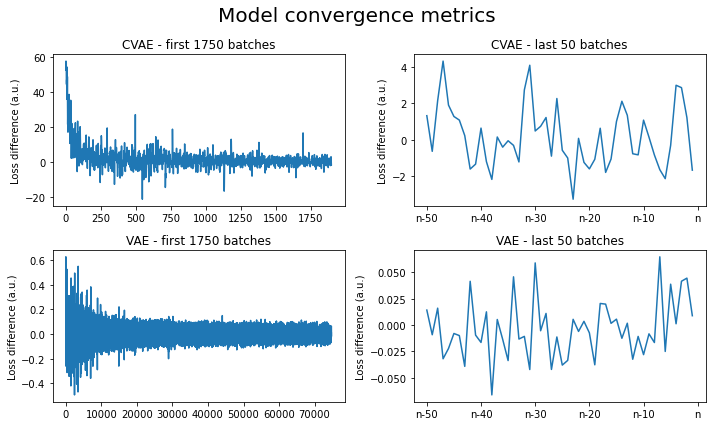

In [21]:
fig,axs = plt.subplots(2,2,figsize=np.array((5,3))*2)

plt.subplot(2,2,1)
vec1=moving_average(cvae_loss,50)[1::]
vec2=moving_average(cvae_loss,50)[0:-1]
plot_vec = (vec2-vec1)[25::]
plt.plot(plot_vec)
plt.ylabel('Loss difference (a.u.)')
plt.title('CVAE - first 1750 batches')

plt.subplot(2,2,2)
vec1=moving_average(cvae_loss,50)[1::]
vec2=moving_average(cvae_loss,50)[0:-1]
plot_vec = (vec2-vec1)[-50::]
plt.plot(plot_vec)
plt.ylabel('Loss difference (a.u.)')
plt.title('CVAE - last 50 batches')
xlbls = [f'n-{val}' for val in np.arange(0,51,10)[-1::-1]]
xlbls[-1] = 'n'
plt.xticks(np.arange(0,51,10),labels=xlbls)

plt.subplot(2,2,3)
vec1=moving_average(vae_loss,50)[1::]
vec2=moving_average(vae_loss,50)[0:-1]
plot_vec= (vec2-vec1)[25::]
vae_plotvec = plot_vec
#plot_vec= (vec2-vec1)[-100::]
plt.plot(plot_vec)
plt.ylabel('Loss difference (a.u.)')
plt.title('VAE - first 1750 batches')

plt.subplot(2,2,4)
vec1=moving_average(vae_loss,50)[1::]
vec2=moving_average(vae_loss,50)[0:-1]
plot_vec= (vec2-vec1)[-50::]
plt.plot(plot_vec)
plt.ylabel('Loss difference (a.u.)')
plt.title('VAE - last 50 batches')

xlbls = [f'n-{val}' for val in np.arange(0,51,10)[-1::-1]]
xlbls[-1] = 'n'
plt.xticks(np.arange(0,51,10),labels=xlbls)


fig.suptitle("Model convergence metrics", fontsize=20)
plt.tight_layout()
plt.savefig('../figures/loss_at_convergence.pdf')

In [22]:
pwd

'/mmfs1/data/aglinska/BC-MRI-AE/Colab Notebooks'

In [23]:
pwd

'/mmfs1/data/aglinska/BC-MRI-AE/Colab Notebooks'

In [24]:
indir = '/mmfs1/data/aglinska/tf_outputs/CVAE/'
files = [file for file in os.listdir(indir) if file.endswith('loss.pickle')]
files.sort()
files

['16dim_noDis_evBatch_loss.pickle',
 'Feb03_1459_D16B1G100_DTrue_loss.pickle',
 'Feb04_0524_D16B1G100_DTrue_continued_loss.pickle',
 'Feb04_0524_D16B1G100_DTrue_loss.pickle',
 'Feb05_0908_D16B1G100_DTrue_loss.pickle',
 'Feb23_1049_D16B1G1_DTrue_loss.pickle',
 'Feb23_1400_D2B1G100_DTrue_loss.pickle',
 'Feb23_1551_D16B1G100_DTrue_loss.pickle',
 'Feb26_1330_CVAE_D16B1G1_adam_loss.pickle',
 'Feb26_1330_forPaperFakeAbide_loss.pickle',
 'Feb26_1330_playforClustering_loss.pickle',
 'Feb_3d_16D_Dis_fixed_loss.pickle',
 'Jan12_disentagled_l16_loss.pickle',
 'Jan24_d16_dis_flipped_b5g20_earlyStop_loss.pickle',
 'Jan24_d16_dis_flipped_b5g20_loss.pickle',
 'Jan4th_loss.pickle',
 'Mar18_1312_CVAE_D16B1G1_adam_rData2_loss.pickle',
 'Mar18_1312_CVAE_D16B1G1_adam_rData_loss.pickle',
 'Mar18_2009_CVAE_D16B1G100_adam4real_rData2_loss.pickle',
 'Mar18_2009_CVAE_D16B1G100_adam4real_rData_loss.pickle',
 'Mar18_2009_CVAE_D16B1G100_adam_rData2_loss.pickle',
 'Mar18_2009_CVAE_D16B1G100_adam_rData3_loss.pickle

In [25]:
for idx,file in enumerate(files):
    n = len(pickle.load(open(os.path.join(indir,file),'rb')))
    print(f'{idx} | {file} | {n}')

0 | 16dim_noDis_evBatch_loss.pickle | 3780
1 | Feb03_1459_D16B1G100_DTrue_loss.pickle | 200
2 | Feb04_0524_D16B1G100_DTrue_continued_loss.pickle | 6500
3 | Feb04_0524_D16B1G100_DTrue_loss.pickle | 1200
4 | Feb05_0908_D16B1G100_DTrue_loss.pickle | 100
5 | Feb23_1049_D16B1G1_DTrue_loss.pickle | 4175
6 | Feb23_1400_D2B1G100_DTrue_loss.pickle | 5500
7 | Feb23_1551_D16B1G100_DTrue_loss.pickle | 1971
8 | Feb26_1330_CVAE_D16B1G1_adam_loss.pickle | 27000
9 | Feb26_1330_forPaperFakeAbide_loss.pickle | 4600
10 | Feb26_1330_playforClustering_loss.pickle | 2400
11 | Feb_3d_16D_Dis_fixed_loss.pickle | 6094
12 | Jan12_disentagled_l16_loss.pickle | 10150
13 | Jan24_d16_dis_flipped_b5g20_earlyStop_loss.pickle | 2790
14 | Jan24_d16_dis_flipped_b5g20_loss.pickle | 40950
15 | Jan4th_loss.pickle | 67608
16 | Mar18_1312_CVAE_D16B1G1_adam_rData2_loss.pickle | 9925
17 | Mar18_1312_CVAE_D16B1G1_adam_rData_loss.pickle | 600
18 | Mar18_2009_CVAE_D16B1G100_adam4real_rData2_loss.pickle | 5151
19 | Mar18_2009_CVAE

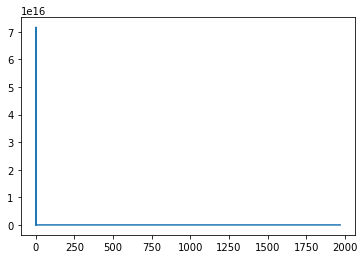

In [26]:
v = pickle.load(open(os.path.join(indir,files[7]),'rb'))
plt.plot(v[-5000::])